In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("olympics_08_medalists.csv")

In [7]:
data.head

<bound method NDFrame.head of           medalist_name male_archery female_archery male_athletics  \
0       Aaron Armstrong          NaN            NaN           gold   
1         Aaron Peirsol          NaN            NaN            NaN   
2      Abdullo Tangriev          NaN            NaN            NaN   
3     Abeer Abdelrahman          NaN            NaN            NaN   
4               Abhinav          NaN            NaN            NaN   
...                 ...          ...            ...            ...   
1870        Éver Banega          NaN            NaN            NaN   
1871  Ólafur Stefánsson          NaN            NaN            NaN   
1872      Óscar Brayson          NaN            NaN            NaN   
1873   Łukasz Pawłowski          NaN            NaN            NaN   
1874        Živko Gocić          NaN            NaN            NaN   

     female_athletics male_badminton female_badminton male_baseball  \
0                 NaN            NaN              NaN     

## Data Cleaning and Tidying

### Data Transformation: Melt Operation

In [88]:
# Using melt to reshape the data
tidy_data = data.melt(id_vars = "medalist_name",
                      var_name = "sports",
                      value_name = "award")      
print(tidy_data)

            medalist_name                      sports award
0         Aaron Armstrong                male_archery   NaN
1           Aaron Peirsol                male_archery   NaN
2        Abdullo Tangriev                male_archery   NaN
3       Abeer Abdelrahman                male_archery   NaN
4                 Abhinav                male_archery   NaN
...                   ...                         ...   ...
131245        Éver Banega  male_greco-roman wrestling   NaN
131246  Ólafur Stefánsson  male_greco-roman wrestling   NaN
131247      Óscar Brayson  male_greco-roman wrestling   NaN
131248   Łukasz Pawłowski  male_greco-roman wrestling   NaN
131249        Živko Gocić  male_greco-roman wrestling   NaN

[131250 rows x 3 columns]


In [15]:
# Drop rows with missing values
tidy_data = tidy_data.dropna()
print(tidy_data)

              medalist_name                      sports   award
177            Bair Badënov                male_archery  bronze
676           Ilario Di Buò                male_archery  silver
682            Im Dong-hyun                male_archery    gold
760               Jiang Lin                male_archery  bronze
920          Lee Chang-hwan                male_archery    gold
...                     ...                         ...     ...
130932        Steeve Guénot  male_greco-roman wrestling    gold
131159  Yannick Szczepaniak  male_greco-roman wrestling  bronze
131162       Yavor Yanakiev  male_greco-roman wrestling  bronze
131200      Yury Patrikeyev  male_greco-roman wrestling  bronze
131234         Zoltán Fodor  male_greco-roman wrestling  silver

[1875 rows x 3 columns]


### Data Splitting: Separating Gender and Sport Events

In [27]:
# Split the 'sports' column into two new columns: 'gender' and 'event'
tidy_data[["gender", "event"]]= tidy_data["sports"].str.split("_", expand = True)
print(tidy_data[["gender", "event"]])

       gender                  event
177      male                archery
676      male                archery
682      male                archery
760      male                archery
920      male                archery
...       ...                    ...
130932   male  greco-roman wrestling
131159   male  greco-roman wrestling
131162   male  greco-roman wrestling
131200   male  greco-roman wrestling
131234   male  greco-roman wrestling

[1875 rows x 2 columns]


In [39]:
print(tidy_data)

              medalist_name   award gender                  event
177            Bair Badënov  bronze   male                archery
676           Ilario Di Buò  silver   male                archery
682            Im Dong-hyun    gold   male                archery
760               Jiang Lin  bronze   male                archery
920          Lee Chang-hwan    gold   male                archery
...                     ...     ...    ...                    ...
130932        Steeve Guénot    gold   male  greco-roman wrestling
131159  Yannick Szczepaniak  bronze   male  greco-roman wrestling
131162       Yavor Yanakiev  bronze   male  greco-roman wrestling
131200      Yury Patrikeyev  bronze   male  greco-roman wrestling
131234         Zoltán Fodor  silver   male  greco-roman wrestling

[1875 rows x 4 columns]


## Visualizations

### Counting Medals Won by Gender

In [41]:
medal_counts = tidy_data["gender"].value_counts()

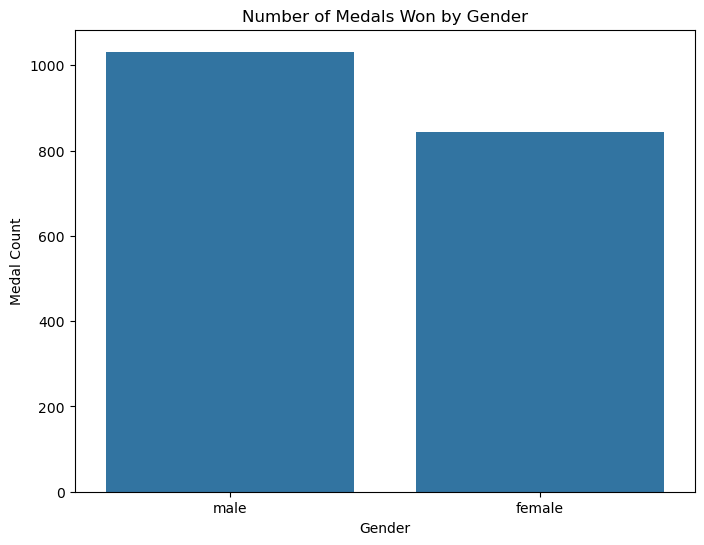

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x=medal_counts.index, y=medal_counts.values)
plt.xlabel("Gender")
plt.ylabel("Medal Count")
plt.title("Number of Medals Won by Gender")
plt.show()

### Medal Distribution Across Top 10 Sports

In [60]:
event_counts = tidy_data["event"].value_counts().head(10)

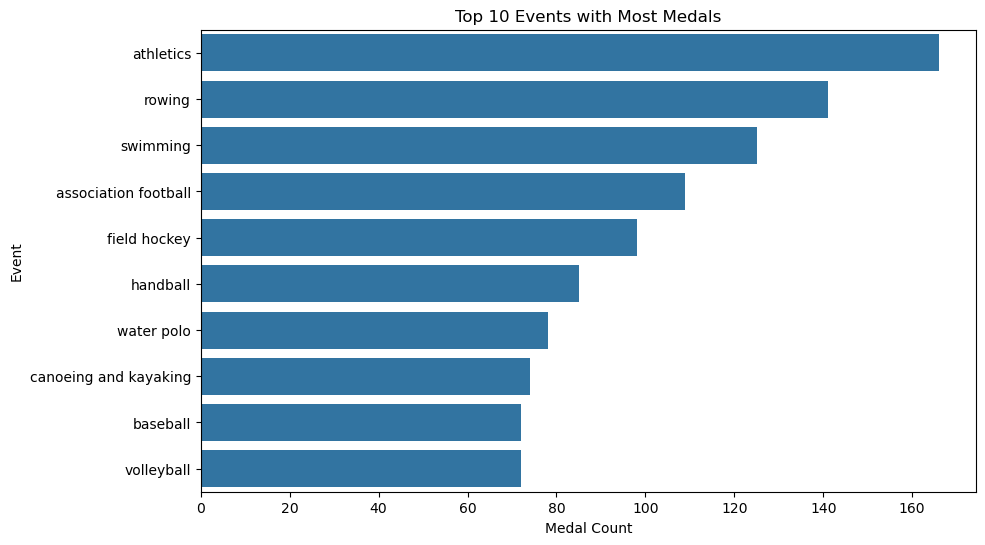

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x=event_counts.values, y=event_counts.index) 
plt.xlabel("Medal Count")
plt.ylabel("Event")
plt.title("Top 10 Events with Most Medals")
plt.show()

## Pivot Table

In [74]:
pivot_gender = pd.pivot_table(tidy_data, 
                             index="event",  
                             columns="gender",  
                             values="medalist_name", 
                             aggfunc="count",  
                             fill_value=0)  

print(pivot_gender.head(10))

gender                female  male
event                             
archery                    9    11
artistic gymnastics       20    29
association football      54    55
athletics                 81    85
badminton                 10    12
baseball                   0    72
basketball                36    35
beach volleyball           6     6
bmx                        3     3
boxing                     0    44


In [76]:
pivot_gold_medals = pd.pivot_table(
    tidy_data,                
    index="gender",           
    values="medalist_name",   
    aggfunc="count",          
    fill_value=0)             

print(pivot_gold_medals)


        medalist_name
gender               
female            843
male             1032
